# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

1 - Is the distibution of the Body Temperatures Normal?

In [97]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [36]:
df.count()# The dataframe is composed of 130 rows of three diferent on 
          #three different data types: temperature, gender and heart_rate

temperature    130
gender         130
heart_rate     130
dtype: int64

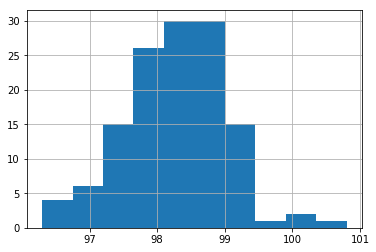

In [72]:
t=df['temperature']
t.hist() 

In [94]:
# The histogram does not look nicely,but rather than focusing on it
# I will see if the data is normalized by following the 66-96-99 rule
sd=t.std()  
m=t.mean()

In [95]:
#One standard deviation
sd1=t[t>=m-sd]
sd1=sd1[t<=m+sd].count()
sd1=sd1*1.0/t.count()
#Two standard deviation
sd2=t[t>=m-2*sd]
sd2=sd2[t<=m+2*sd].count()
sd2=sd2*1.0/t.count()
#Three standard deviation
sd3=t[t>=m-3*sd]
sd3=sd3[t<=m+3*sd].count()
sd3=sd3*1.0/t.count()
#Distributions
sd1,sd2,sd3
#The data is very close to being normalized, we will therefore treat as if it was

(0.69230769230769229, 0.94615384615384612, 0.99230769230769234)

2 - Is the sample size large? Are the observations independent?

The sample size is indeed large, as we saw before the count of its data types is 130, therefore; we will only focus on the second part of the question: are the observations independent?

In [107]:
t=df['temperature']
h=df['heart_rate']
g=df['gender']
th_corr=t.corr(h,method='pearson') #correlation for temperature and gender 
g_int=g.replace('M',1)#In order to use the corr method for gender I must replace it values for 1s(male) and 0s(female)
g_int=g_int.replace("F",0)
tg_corr=t.corr(g_int,method='pearson')
hg_corr=g_int.corr(h,method='pearson')
th_corr, tg_corr, hg_corr

(0.25365640272076417, -0.19800622214525374, -0.055766220605377032)

To answer quesiton 2: There is some correlation between the variables, which might impact the results of our test

3 - Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  tt  or  zz  statistic?
    Now try using the other test. How is the result be different? Why?

A z-statistic would be the best apporach due the large quantity of data (130) and also beacuase we are testing the sample data against a predetermined point, and a one sample test will be better due to the fact that each data set is not independent.

In [119]:
#The null hypothesis is that the temperature is in fact 98.6
#The alternative hypothesis is that temperature is not 98.6 
# To test the hypothesis we first we get our aproximated standard deviation and our mean
asd=sd/130**(1/2.0) # We divide the sd by the sqrt of our sample
asd,m #We have the mean and the standard deviation



(0.06430441683789101, 98.24923076923078)

In [122]:
#We want to see how many standards deviations is the 98.6 away from the mean
z_score=(98.6-m)/asd
z_score

5.454823292364079

In [135]:
#We want to caluclate the probability of the z-score
import scipy.stats as st
1-st.norm.cdf(z_score)
#The probability is way below our threshold(5%), we therefore, reject the null hypothesis

2.4510785068265761e-08

In [141]:
#Now using the t stat, with 129(130-1) degrees of freedom
1-st.t.cdf(z_score, 129) # The result is one order of magnitude bigger than that of the one obtained using the z-statistic
#because t-stats are designed to compensate for the lack of data in small samples, but lack accuracy in larger samples

1.2053160214353653e-07

4--At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [145]:
thresh=st.norm.ppf(1-.05)# Using the standard threshold of 5% as considering a data to be abnormal
thresh1=-thresh*asd+m    # we compute a 95% confidence interval between these two thresholds 
thresh2=thresh*asd+m
thresh1, thresh2

(98.143459415965978, 98.355002122495577)

5--Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem

In [212]:
man=df[df.gender=='M']
man=man['temperature']
women=df[df.gender=='F']
women=women['temperature']
man,women

(2      97.8
 5      99.2
 6      98.0
 7      98.8
 12     98.2
 17     98.2
 19     99.4
 21     98.2
 22     98.6
 23     98.4
 24     97.8
 29     98.1
 30     98.3
 32     98.5
 33     98.6
 34     99.3
 35     99.5
 36     99.1
 37     98.3
 41     98.4
 42     96.9
 43     97.2
 46     97.4
 47     97.4
 48     97.9
 49     97.1
 53     98.6
 57     98.2
 59     97.6
 61     98.4
        ... 
 73     98.8
 74     99.0
 75     98.8
 77     98.4
 78     97.4
 79     97.6
 81     98.0
 82     97.5
 85     97.1
 87     98.0
 88     98.7
 89     98.1
 90     97.8
 93     97.1
 94     97.8
 99     98.0
 100    99.0
 101    98.5
 104    97.6
 105    96.7
 106    97.0
 107    98.6
 109    97.3
 114    99.0
 115    98.0
 118    98.7
 124    97.5
 125    96.3
 126    97.7
 128    97.9
 Name: temperature, Length: 65, dtype: float64, 0       99.3
 1       98.4
 3       99.2
 4       98.0
 8       98.4
 9       98.6
 10      98.8
 11      96.7
 13      98.7
 14      97.8
 15      98.8
 16   

In [214]:
st.ttest_ind(man,women)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

I did a two tailed t-test between the temperatures of men and women due to the small number of samples for each of the categories and also due to the easiness in which python can compute t-test.
The pvalue forces us to reject the null hypothesis for the alternative and state that we are 98% confident that there is a difference between the temperature of men and women